In [1]:
%matplotlib inline

---
# Data Exploration

**搞机器学习，对数据和业务的认识很重要**，所以下面就先来看看数据长什么样子，以及数据可视化中常用的方法和工具，python中数据的读取以及处理的瑞士军刀非pandas莫属，而可视化有matplotlib和seaborn两个方便的工具

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Data
这里直接将train data和test data放到一个DataFrame中，方便后面做哑编码时train和test对应关系乱掉，当然也可以只用train data进行分析，这里只是为了后面预处理的时候方便些

In [3]:
df_train = pd.read_csv('data/train.csv',index_col=0)
df_test = pd.read_csv('data/test.csv',index_col=0)
df_features = pd.concat([df_train, df_test], keys=['train', 'test'])

## Basic Info

pandas中有几个常用的方法可以查看数据的整体情况：
- **DataFrame.head()** : 查看DataFrame的开头几行，对数据有个大概了解
- **DataFrame.describe()** : 查看DataFrame中数值型数据的基本统计信息，包括数量、均值、方差、最大最小值、百分位数
- **DataFrame.info()** : 查看DataFrame中每个字段的数据缺失情况，以及字段的数据类型
- **DataFrame.get_dtype_counts()** : 各个数据类型的个数
- **DataFrame.shape**: 数据的维度，即样本量和特征个数
- **DataFrame.size**: 数据个数，也就是【样本量*特征个数】

对于本例的房价数据，用以上方法可以看到数据共有80个特征，其中有43个是category类型（需要哑编码），34个是整型，另外3个是float类型。

## Checking for NANs
对于机器学习来说，对NAN的处理是非常重要的，NAN不处理掉，后面都无法训练数据。先来瞅一眼train和test中各个特征的缺失率，从下表可以看到，PoolQC、MiscFeature、Alley、Fence这几个特征的缺失率特别的高，FireplaceQu也达到了50左右，在预处理的时候可以考虑将这几个特征删除掉

In [4]:
NANs = pd.concat([df_train.dtypes, df_train.isnull().sum(), df_train.isnull().sum()/df_train.shape[0], 
                  df_test.isnull().sum(), df_test.isnull().sum()/df_test.shape[0]], 
                 axis = 1, keys=['dtype','Train', 'Train_percentage', 'Test', 'Test_percentage'])
NANs_sort = NANs.sort_values(['Train_percentage','Test_percentage'], axis=0, ascending=False)
# NANs_sort[(NANs_sort.Train>0) | (NANs_sort.Test>0)] #print the NAN count greater than zero
NANs_sort

,dtype,Train,Train_percentage,Test,Test_percentage
PoolQC,object,1453,0.995205,1456.0,0.997944
MiscFeature,object,1406,0.963014,1408.0,0.965045
Alley,object,1369,0.937671,1352.0,0.926662
Fence,object,1179,0.807534,1169.0,0.801234
FireplaceQu,object,690,0.472603,730.0,0.500343
LotFrontage,float64,259,0.177397,227.0,0.155586
GarageCond,object,81,0.055479,78.0,0.053461
GarageFinish,object,81,0.055479,78.0,0.053461
GarageQual,object,81,0.055479,78.0,0.053461
GarageYrBlt,float64,81,0.055479,78.0,0.053461


## Data Visualization

**0. target visualization**

拿到一个机器学习任务，首先看看其目标变量长生么样子，对于预测任务，可以通过`seaborn.distplot`查看其直方图，对于分类任务可以用`seaborn.countplot`来查看各个分类的数量情况

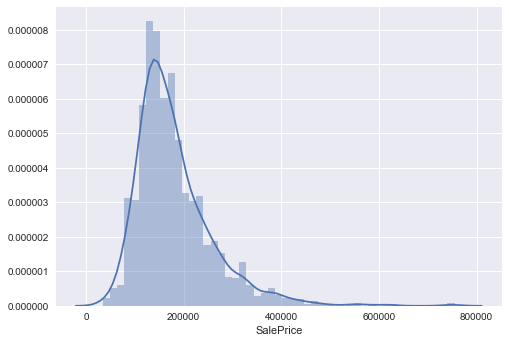

In [5]:
sns.distplot(df_train.SalePrice)

房价预测这个例子中要求使用对目标变量求log之后计算RMSE，那么再来看看取log之后的分布情况：

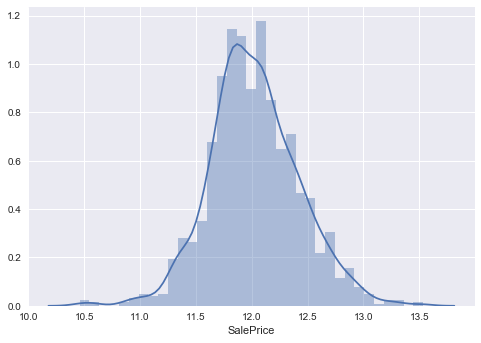

In [6]:
sns.distplot(np.log(df_train.SalePrice))

在一个机器学习任务中，通常会有多种数据类型，主要可以分为两类：**numerical type**和**categorical type**，对于两种类型的数据需要才有用不同的可视化方法去查看其分布规律，seaborn中对于两种数据类型都提供了简便的可视化方法。

**1. numeric type visualization**

对于**numerical type**，我们比较关心的是每个特征与目标变量，特征与特征之间的关系以及分布情况，同时采用散点图的方式，可以直观的查看出异常点。seaborn中常用的numerical type可视化方法有：`pairplot`,`jointplot`, `lmplot`等等。对于`pairplot`，如果特征特别多（如本例），不建议一起绘制出来，那样速度太慢，分开绘制会比较好。这里简单的列举几个特征与目标变量Y之间的散点图

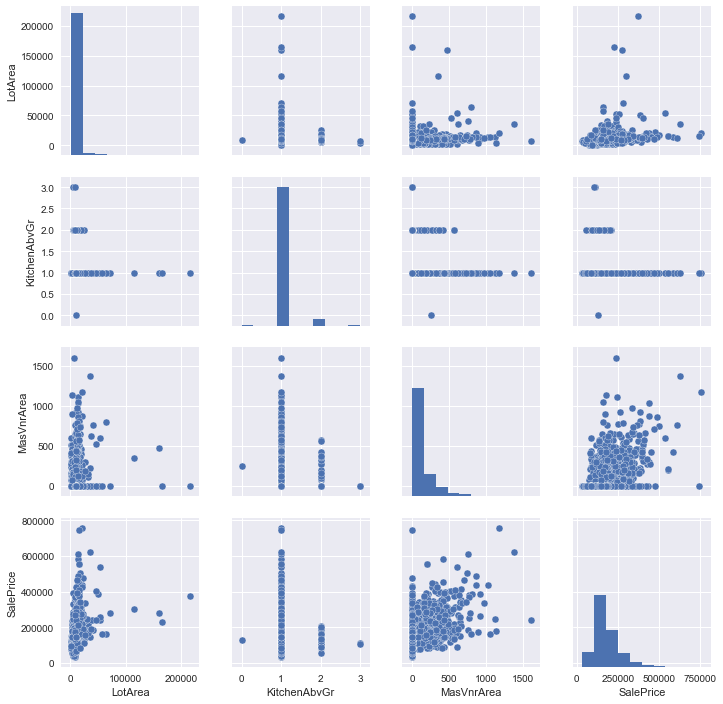

In [7]:
numeric_columns = df_train.dtypes[df_train.dtypes != 'object'].index  #get the numeric columns for visualization
# numeric_columns = numeric_columns.drop(['SalePrice']) #drop the target column

sns.pairplot(df_train[['LotArea', 'KitchenAbvGr','MasVnrArea','SalePrice']].dropna())  #如果feature数量比较少，可以直接用numeric_columns
# 注：这里seaborn自带的dropna不起作用，详见：https://github.com/mwaskom/seaborn/issues/1087

**2. numeric与target相关系数**

通过相关系数（皮尔逊相关系数）可视化关系图，可以numeric type的特征之间的关联程度，包括以target、各个feature之间的关联程度，虽然没有上面的散点图直观，当时可以纵观全局，并且有具体的数值，再通过上面的散点图（pairplot）以及线性回归图（lmplot）探索变量间的具体情况

在选特征或者后续处理中，应该选择与目标变量相关系数高的特征，特征之间的相关系数如果比较高，那么需要考虑**降维**处理。

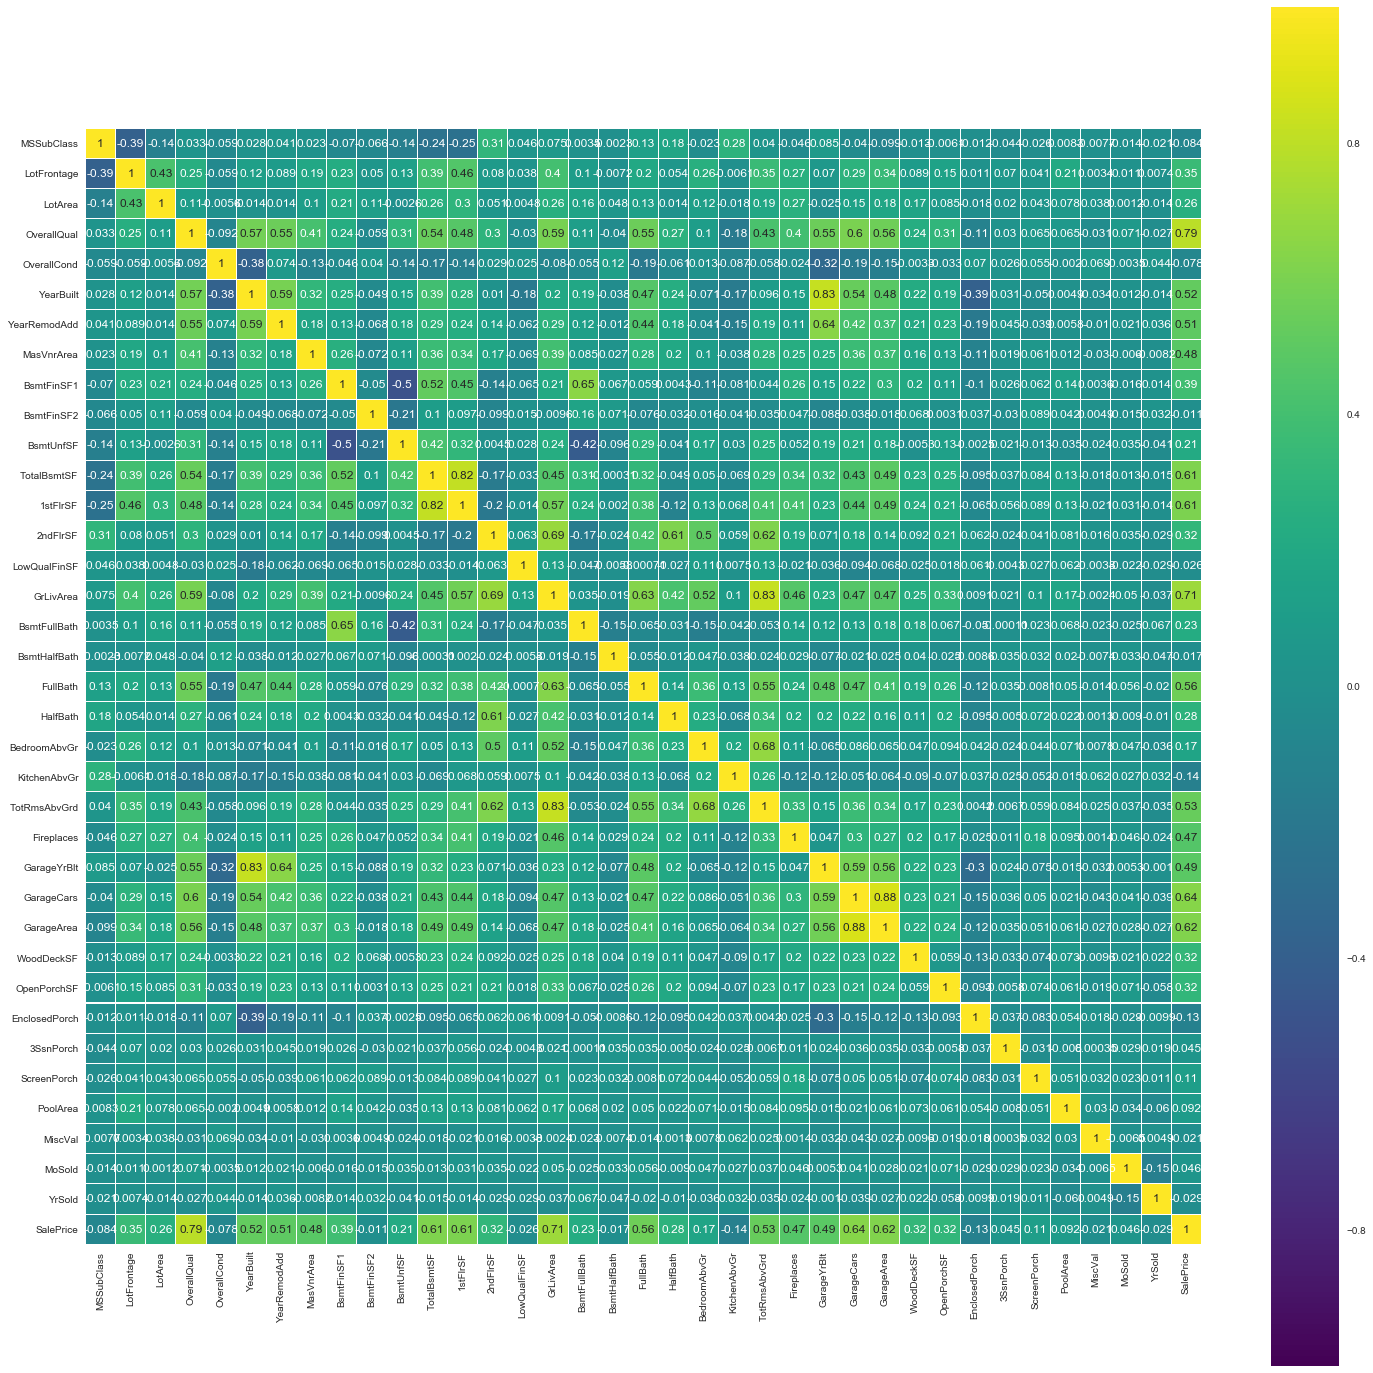

In [8]:
corrmat = df_train[numeric_columns].corr()
lm = sns.heatmap(corrmat,vmax=1, linewidths=0.01, square=True,annot=True,cmap='viridis',linecolor="white")
lm.figure.set_size_inches(25,25)

**3. categorical type visualization**

打印每个category的类别名称以及类别数量

In [9]:
category_columns = df_train.dtypes[df_train.dtypes == 'object'].index
# df_train[category_columns].apply(pd.value_counts)  #若果feature数量比较少，可以用这种方式
for idx, item in enumerate(category_columns):
    print('feature: {0} value counts:\n{1} \n'.format(item,df_train[item].value_counts()))

feature: MSZoning value counts:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

feature: Street value counts:
Pave    1454
Grvl       6
Name: Street, dtype: int64 

feature: Alley value counts:
Grvl    50
Pave    41
Name: Alley, dtype: int64 

feature: LotShape value counts:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

feature: LandContour value counts:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

feature: Utilities value counts:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

feature: LotConfig value counts:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

feature: LandSlope value counts:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

feature: Neighborhood value counts:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Nr

可视化categorical type中每个feature与target的分布关系，需要一个一个可视化，最常用的方式当属`seaborn.swarmplot`和`seaborn.boxplot`

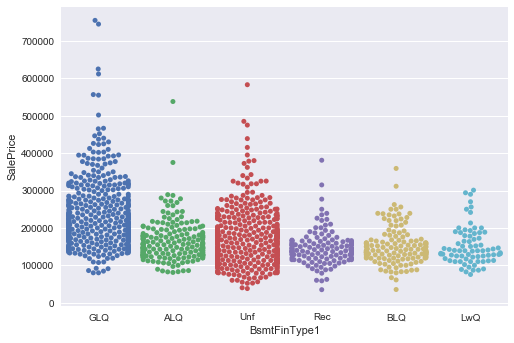

In [10]:
category_columns = df_train.dtypes[df_train.dtypes == 'object'].index
sns.swarmplot(x="BsmtFinType1", y="SalePrice", data=df_train);

/Users/sshuair/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


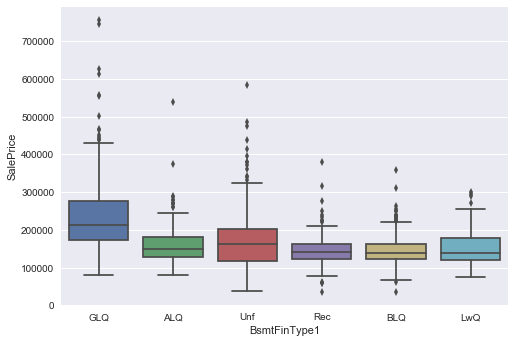

In [11]:
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=df_train)

**4. visualize relation between each feature and target**

通过上面整体的对数据进行一些洞察之后，我们可以挑选比较重要的数据进行分析，看看其与target之间的具体关系

比如OverallQual与价格的皮尔逊相关系数高达0.79，可以拿出来具体看看

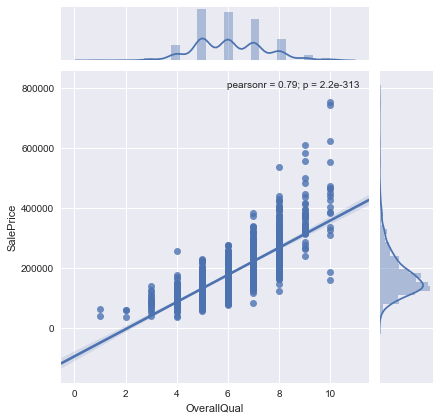

In [12]:
sns.jointplot(x="OverallQual", y="SalePrice", data=df_train, kind="reg");

---
# Data Preprocessing


Data Preprocessing理论上应当归于与Feature Engineering，而特征工程包括了太多的内容，这里主要讲一下其中的预处理部分，等以后经验多了在总结总结特征工程这一部分。

数据预处理这一步，很大程度上依赖于前面的Data Exploration，常见的处理过程有：
- Missing Data: 缺失值处理
- Outlier: 异常值/离群点
- Encoding: categorical type 编码

## Missing Data

这里采用简单的填充方式，用均值、众数、中位数等形式填充，更好的方法应该结合每个feature的特点去填充相应的missing data

**1. 删除NAN特别多的字段**

In [13]:
df_features.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

**2. fill NAN(categorical type)**

In [14]:
for item in df_features.dtypes[df_features.dtypes == 'object'].index:
    mode = df_features[item].mode()[0]
    df_features[item].fillna(mode,inplace=True)

**3. fill NAN(numerical type)**

In [15]:
for item in df_features.dtypes[df_features.dtypes == 'float64'].index:
    mode = df_features[item].mean()
    df_features[item].fillna(mode,inplace=True)

## encoding categorical features

对于[categorical type](https://en.wikipedia.org/wiki/Categorical_variable)，是无法直接用于训练模型的，需要进一步处理成数值型，才可以用于后续操作。常用的encoding方式有两种：**LabelEncoder**、**OneHotEncoder**，sklearn中对这两种方式都做了实现，pandas中用get_dummies方法实现。在机器学习中用的最多的是哑编码（也就是Dummy coding或OneHotEncoder）, 当然如果某个特征的取值有成百上千个，用Dummy coding这种方式显然就不合适了，最好的方式是用LabelEncoder，或者更具这个特征的分布特征，把重要的几个取值和剩余的取值进行哑编码。

In [16]:
# pandas方式
df_features_encode = pd.get_dummies(df_features)

In [17]:
# sklearn方式
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])

# enc.fit_transform(df_train)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

---
# Training Model

In [18]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import metrics, linear_model
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn import ensemble, svm, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

prepare the trainning data

In [20]:
y = df_features_encode.loc['train',['SalePrice']]
y = np.log(y['SalePrice'])
X = df_features_encode.loc['train',:].copy()
X.drop('SalePrice', axis=1, inplace=True)

### Split Train and validation data
一部分用于训练，一部分用于验证模型的泛化能力，这里训练集和测试集比例为8:2

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1168, 275) (292, 275) (1168,) (292,)


## Feature Selection

如果参数太多，也可以通过SelectKBest选出最相关的参数

In [26]:
# X_new = SelectKBest(f_regression, k=20).fit_transform(X_train, y_train)

## Training Model

In [22]:
from sklearn import linear_model
model =  linear_model.LinearRegression()
model.fit(X_train,y_train)

/Users/sshuair/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# 测试集得分
model.score(X_train,y_train)

0.9449534453402425

In [26]:
# 验证集得分
model.score(X_valid,y_valid)

0.8910664491456228

In [29]:
# 验证集误差RMSE
y_pred = model.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.128798802314841

In [37]:
# 真值与预测值对比
list(zip(list(np.exp(y_valid)), list(np.exp(y_pred))))

[(62382.99999999996, 129240.63798238414),
 (119000.0000000001, 119246.61193811553),
 (133500.0000000001, 133294.9558522411),
 (196000.00000000006, 210655.86127469677),
 (200999.99999999994, 186345.64840716502),
 (501837.0000000002, 501651.38745342084),
 (159999.9999999999, 127966.63814797309),
 (179999.99999999997, 203030.27508741125),
 (159500.00000000006, 138176.26181765145),
 (138799.99999999997, 126393.98419817837),
 (130999.99999999993, 122145.47770130199),
 (130000.00000000006, 118106.61878053786),
 (130999.99999999993, 126420.39258676485),
 (148499.99999999997, 144488.49284009528),
 (237000.00000000003, 241935.9334173456),
 (177999.99999999994, 173440.00516427378),
 (208500.00000000012, 204177.21110247655),
 (177499.99999999997, 153371.90381736885),
 (162499.9999999999, 181230.43313913385),
 (128000.00000000004, 127439.38640883291),
 (172399.99999999988, 180701.34799536996),
 (181900.00000000003, 181092.93585693662),
 (200000.00000000006, 212414.88438881023),
 (131500.0000000001

## Tuning Parameters

调参是搞机器学习的人最津津乐道的部分，调参的方式有很多种，可以自己手动设置参数范围，用for循环来调参，不过这总方式太原始了，sklearn中提供了[GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)和[RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)两种调参方法。

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_jobs=-1)
params = {
    'max_features': [0.25, 0.5, 0.7],
    'max_depth' : [ 2,5,10,20],
    'n_estimators': [50, 100, 200]
}
gs = GridSearchCV(cv=5, param_grid=params, estimator=rfr, verbose=0)
gs.fit(X_train,y_train)
print(gs.best_params_, gs.best_score_)

{'n_estimators': 200, 'max_depth': 20, 'max_features': 0.5} 0.8736793992624902


In [50]:
bst_model = RandomForestRegressor(max_depth=20, max_features=0.25, n_estimators=200)
bst_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
# 验证集误差RMSE
y_pred = bst_model.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.13722737670257254

---
# Prediction

In [247]:
X_predict = df_features_encode.loc['test',:].copy()
X_predict.drop('SalePrice',axis = 1, inplace=True)

In [369]:
rf = ensemble.RandomForestRegressor(max_features= 0.4, n_estimators=366, min_samples_leaf= 0)
rf.fit(X_train,y_train)
y_pred = np.exp(rf.predict(X_predict))
pd.Series(y_pred).to_csv('y_pred2.csv')